<a href="https://colab.research.google.com/github/ImAli0/DeepLearning_projects/blob/main/NN_from_scratch/NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network from Scratch in TensorFlow

#Introduction and Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nn_utils
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.15.0


#Neural Network

In [2]:
class NeuralNetwork:

    # INITIALIZING
    def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        self.num_features = layers[0]
        self.num_classes = layers[-1]

        self.W = {}
        self.b = {}

        self.dW = {}
        self.db = {}

        self.setup()

    def setup(self):

        for i in range(1, self.L):
          # Applying 'He' initialization to prevent the issue of
          # vanishing/exploding gradients in deep nets on  W parameter
            self.W[i] = tf.Variable(np.random.randn(self.layers[i],
                          self.layers[i-1]) * np.sqrt(2. / self.layers[i-1]),
                                    dtype = np.float32)
            self.b[i] = tf.Variable(tf.zeros(shape=(self.layers[i], 1)))

    # FORWARD PROPAGATING
    def forward_prop(self, A):
        A = tf.convert_to_tensor(A, dtype=tf.float32)
        for i in range(1, self.L):
            Z = tf.matmul(A, tf.transpose(self.W[i])) + tf.transpose(self.b[i])
            if  i != self.L - 1 :
                A = tf.nn.relu(Z)
            else:
                A = Z
        return A

    # LOSS COMPUTING
    def compute_loss(self, A, Y):
        loss = tf.nn.softmax_cross_entropy_with_logits(Y, A)
        return tf.reduce_mean(loss)

    # PARAMETER UPDATING
    def update_params(self, lr):
        for i in range(1, self.L):
            self.W[i].assign_sub(lr * self.dW[i])
            self.b[i].assign_sub(lr * self.db[i])

    # PREDICTING
    def predict(self, X):
        A = self.forward_prop(X)
        return tf.argmax(tf.nn.softmax(A), axis=1)

    # INFO ON NN's STRUCTURE
    def info(self):
        num_params = 0
        for i in range(1, self.L):
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self.b[i].shape[0]
        print('Input Features:', self.num_features)
        print('Number of Classes:', self.num_classes)
        print('Hidden Layers:')
        print('--------------')
        for i in range(1, self.L-1):
            print('Layer {}, Units {}'.format(i, self.layers[i]))
        print('--------------')
        print('Number of parameters:', num_params)

    # BATCH TRAINING
    def train_on_batch(self, X, Y, lr):
        X = tf.convert_to_tensor(X, dtype = tf.float32)
        Y = tf.convert_to_tensor(Y, dtype = tf.float32)

        with tf.GradientTape(persistent = True) as tape:
            A = self.forward_prop(X)
            loss = self.compute_loss(A, Y)

        for i in range (1, self.L):
            self.dW[i] = tape.gradient(loss, self.W[i])
            self.db[i] = tape.gradient(loss, self.b[i])

        del tape
        self.update_params(lr)
        return loss.numpy()

    # COMPLETE TRAINING
    def train(self, x_train, y_train, x_test, y_test, epochs, steps_per_epoch,
              batch_size, lr):
        history = {'val_loss': [], 'train_loss': [], 'val_acc': [],
                   'train_acc': []}

        for e in range(0, epochs):
            epoch_train_loss = 0.
            print('Epoch {}'.format(e), end = ' ')
            for i in range(0, steps_per_epoch):
                x_batch = x_train[i * batch_size : (i + 1) * batch_size]
                y_batch = y_train[i * batch_size : (i + 1) * batch_size]

                batch_loss = self.train_on_batch(x_batch, y_batch, lr)
                epoch_train_loss += batch_loss

                if i%int(steps_per_epoch/10) == 0:
                    print(end='=')

            train_loss = epoch_train_loss/steps_per_epoch
            history['train_loss'].append(train_loss)
            val_A = self.forward_prop(x_test)
            train_A = self.forward_prop(x_train)
            val_loss = self.compute_loss(val_A, y_test).numpy()
            history['val_loss'].append(val_loss)
            val_preds = self.predict(x_test)
            train_preds = self.predict(x_train)
            val_acc = np.sum(np.argmax(y_test, axis = 1) ==
                             val_preds.numpy())/len(y_test)
            train_acc = np.mean(np.argmax(y_train, axis = 1) ==
                                train_preds.numpy())
            history['val_acc'].append(val_acc)
            history['train_acc'].append(train_acc)
            print(' \n Train loss', train_loss)
            print(' Val loss', val_loss)
            print(' Train acc', train_acc)
            print(' Val acc', val_acc)
        return history

#Application

11490434/11490434 [==============================] - 0s 0us/step


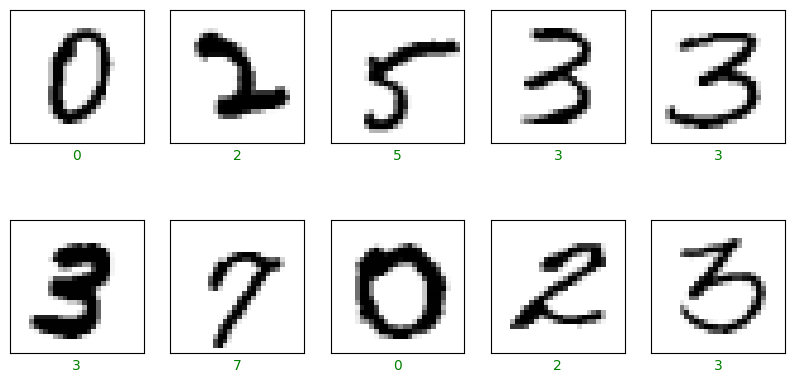

In [3]:
(x_train, y_train), (x_test, y_test) = nn_utils.load_data()
nn_utils.plot_random_examples(x_train, y_train).show()

In [4]:
net = NeuralNetwork([784, 256, 128, 128, 64, 32, 10])
net.info()

Input Features: 784
Number of Classes: 10
Hidden Layers:
--------------
Layer 1, Units 256
Layer 2, Units 128
Layer 3, Units 128
Layer 4, Units 64
Layer 5, Units 32
--------------
Number of parameters: 261034


In [5]:
batch_size = 128
epochs = 50
steps_per_epoch = int(x_train.shape[0]/batch_size)
lr = 3e-3
print('Steps per epoch', steps_per_epoch)

Steps per epoch 468


In [6]:
history = net.train(x_train, y_train, x_test, y_test, epochs, steps_per_epoch,
                    batch_size, lr)

Epoch 0 =========== 
 Train loss 2.016247714177156
 Val loss 1.5119156
 Train acc 0.5945166666666667
 Val acc 0.5979
Epoch 1 =========== 
 Train loss 0.9863408425042772
 Val loss 0.6122602
 Train acc 0.8285333333333333
 Val acc 0.8351
Epoch 2 =========== 
 Train loss 0.5221093591207113
 Val loss 0.42424873
 Train acc 0.8733
 Val acc 0.8774
Epoch 3 =========== 
 Train loss 0.4013596542784546
 Val loss 0.3550559
 Train acc 0.8925
 Val acc 0.8962
Epoch 4 =========== 
 Train loss 0.344532132276103
 Val loss 0.31700245
 Train acc 0.90305
 Val acc 0.9064
Epoch 5 =========== 
 Train loss 0.30923852572838467
 Val loss 0.29159072
 Train acc 0.9114166666666667
 Val acc 0.9156
Epoch 6 =========== 
 Train loss 0.28371108435571957
 Val loss 0.27205294
 Train acc 0.9177666666666666
 Val acc 0.9191
Epoch 7 =========== 
 Train loss 0.2638783853612522
 Val loss 0.25636196
 Train acc 0.9229833333333334
 Val acc 0.9225
Epoch 8 =========== 
 Train loss 0.24766248191555595
 Val loss 0.24323057
 Train acc 0

# Results

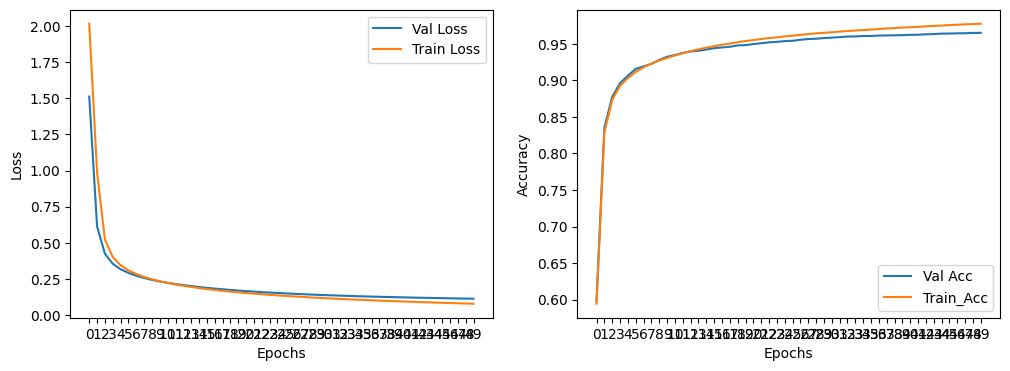

In [9]:
nn_utils.plot_results(history).show()

In [10]:
preds = net.predict(x_test)

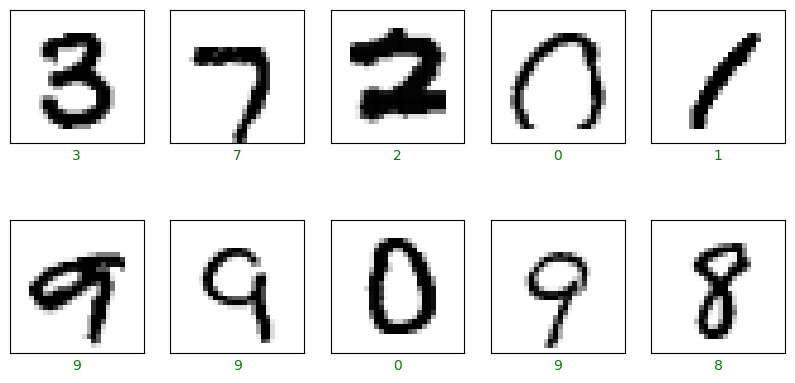

In [11]:
nn_utils.plot_random_examples(x_test, y_test, preds.numpy()).show()